In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from flask import Flask, render_template
from sqlalchemy import create_engine
import geopandas as gpd
import seaborn as sns
import matplotlib as plt
import datetime
import numpy as np

In [87]:
def price_over_time():
    airport = request.args.get("airport")
    date = request.args.get("date")
    if date is None:
        date = '2018-12-23' # today's date
    sql = "SELECT * FROM kayak.flight WHERE Destination=%s AND Date =%s AND Timestamp >='2018-12-01 07:00:00'"
    parameters = (airport,date)
    flights = con.execute(sql, parameters)
    
    flights_table = pd.read_sql(sql, params=parameters, con=con)
    image_filename = LAS_plot(flights_table, airport, date)
    
    return render_template('flight_data.html', flights=flights, image=image_filename)

In [73]:
# WHERE Airline = 'Delta'
#    AND Destination = 'LAS'
total = '''
SELECT * FROM kayak.flight 
    WHERE Date = '2018-12-23' AND Destination = 'LAS' AND Timestamp >= '2018-12-01 07:00:00'
'''


flight = pd.read_sql(total, con=engine)
flight

,Airline,Price,Date,Time,Timestamp,Destination,Prediction
0,Delta,297,2018-12-23,5:15 pm,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
1,JetBlue,341,2018-12-23,9:00 pm,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
2,United Airlines,415,2018-12-23,7:30 pm,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
3,JetBlue,341,2018-12-23,7:30 pm,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
4,Spirit Airlines,367,2018-12-23,8:15 am,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
5,Alaska Airlines,415,2018-12-23,7:30 am,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
6,JetBlue,439,2018-12-23,8:07 am,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
7,American Airlines,508,2018-12-23,2:30 pm,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
8,American Airlines,546,2018-12-23,5:00 am,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days
9,American Airlines,593,2018-12-23,7:00 am,2018-12-01 08:00:18,LAS,Prices are unlikely to decrease within 7 days


In [91]:
def LAS_plot(flight):
    #flights = pd.read_sql(flight, con=con)
    # create table of lowest price over time
    min_price = flight[['Price','Timestamp']].groupby('Timestamp').min()
    min_price.reset_index(inplace=True)
    pd.to_datetime(min_price.Timestamp,format='%Y-%m-%d %H:%M:%S.%f')
    min_price.set_index('Timestamp',inplace=True)
    
    # create plot with x-axis being time data was collected and y-axis being min price at that time
    plot = min_price.plot(figsize=(10, 3), grid=True, title='Price Recorded for Flight to LAS on 12/23/18')
    plot.set_xlabel('Time Recorded (Month-Day Hour)')
    plot.set_ylabel('Price')
    # Store the file under the static folder, and give a name plot-<stationid>.png
    filename = 'images/plot-'+ "LAS2018-12-23" +'.png'
    fig = plot.get_figure()
    fig.savefig(filename)
    fig.clear()
    # Return back the name of the image file
    return filename

In [93]:
LAS_plot(flight)

'images/plot-LAS2018-12-23.png'

<Figure size 720x216 with 0 Axes>

In [ ]:
def price_over_time():
    flights = con.execute("SELECT * FROM kayak.flight WHERE Destination='LAS' AND Date = '2018-12-23'")
    flights_table = pd.read_sql(flights, con=con)
    image_filename = LAS_plot(flights_table,con)
    return render_template('indexLAS.html', flights=flights, image=image_filename)


In [74]:
flight[['Price','Timestamp']].groupby('Timestamp').min()

,Price
Timestamp,
2018-12-01 08:00:18,297
2018-12-01 12:00:20,341
2018-12-01 16:00:18,341
2018-12-01 20:00:19,297
2018-12-02 00:00:21,327
2018-12-02 04:00:19,327
2018-12-02 08:00:17,341
2018-12-02 16:00:18,341
2018-12-02 20:00:14,367


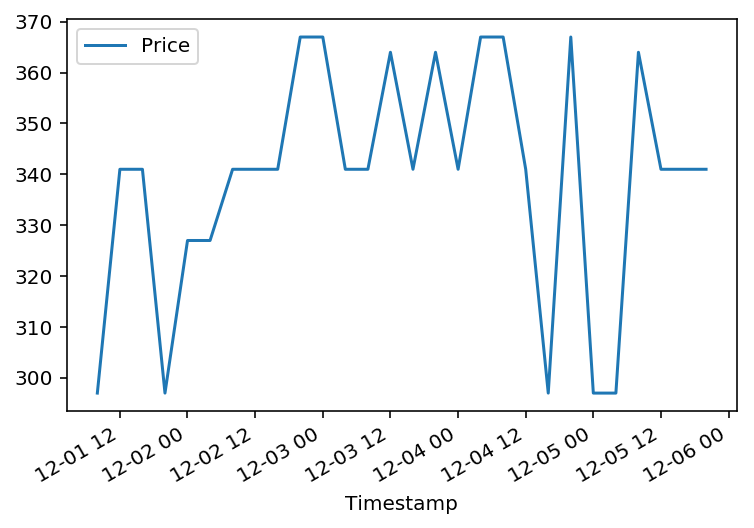

In [75]:
min_price.plot()

In [76]:
def plot_fig(flight)
min_price = flight[['Price','Timestamp']].groupby('Timestamp').min()
min_price.reset_index(inplace=True)
pd.to_datetime(min_price.Timestamp,format='%Y-%m-%d %H:%M:%S.%f')
min_price.set_index('Timestamp',inplace=True)
plot = min_price.plot(figsize=(10, 3), grid=True)

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Time Recorded (Month-Day Hour)')]

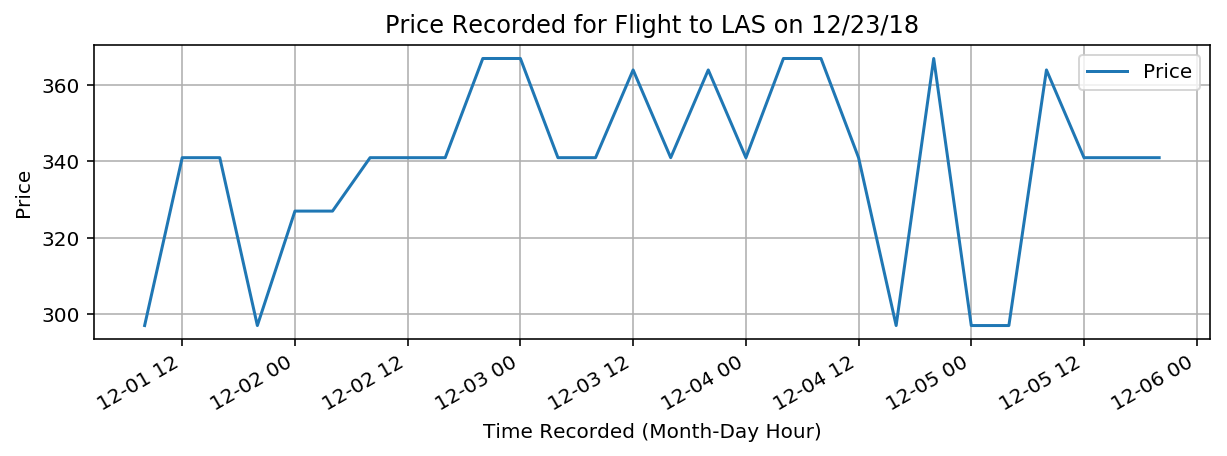

In [84]:
plot = min_price.plot(figsize=(10, 3), grid=True, title='Price Recorded for Flight to LAS on 12/23/18')
plot.set_xlabel('Time Recorded (Month-Day Hour)')
plot.set_ylabel('Price')

In [43]:
datetime.datetime.now()

datetime.datetime(2018, 12, 5, 19, 27, 57, 683683)

In [94]:
total = '''
SELECT * FROM kayak.flight 
    WHERE Date = '2018-12-23' AND Destination = 'LAS' AND Timestamp >= '2018-12-01 07:00:00'
'''


flight = pd.read_sql(total, con=engine)

In [113]:
avg_data = flight[['Price','Timestamp']].groupby('Timestamp').mean()
avg_data = avg_data.reset_index()

In [114]:
avg_data

,Timestamp,Price
0,2018-12-01 08:00:18,550.733333
1,2018-12-01 12:00:20,505.000000
2,2018-12-01 16:00:18,546.266667
3,2018-12-01 20:00:19,397.066667
4,2018-12-02 00:00:21,550.800000
5,2018-12-02 04:00:19,462.600000
6,2018-12-02 08:00:17,494.400000
7,2018-12-02 16:00:18,473.866667
8,2018-12-02 20:00:14,575.857143
9,2018-12-03 00:00:22,523.636364


In [161]:
import pytz
from pytz.reference import Eastern

In [176]:
avg_data.Timestamp[10]

Timestamp('2018-12-03 04:00:13')

In [179]:
utc = pytz.timezone('UTC')
utc_time = avg_data.Timestamp[10].tz_localize(utc)

In [180]:
est = pytz.timezone('US/Eastern')
utc_time.tz_convert(est).strftime(format = "%Y-%m-%d %H:%M:%S")

'2018-12-02 23:00:13'

In [183]:
date =[]
utc = pytz.timezone('UTC')
est = pytz.timezone('US/Eastern')
for i in range(len(avg_data.Timestamp)):
    utc_time = avg_data.Timestamp[i].tz_localize(utc)
    est_time = utc_time.tz_convert(est).strftime(format = "%Y-%m-%d %H:%M:%S")
    date.append(est_time)